In [34]:
#Importing the necessary libraries
import pandas as pd
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
import catboost as cb
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Loading the dataset
data = pd.read_csv('D:\\SLIIT\\3rd year 2nd sem\\Machine Learning amd Optimization Methods\\Coding\\Titanic.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
(data.isnull().sum() / len(data)) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [6]:
data.dropna(subset=['Survived'],inplace=True)

In [7]:
x = data[['Pclass','Sex','Age','Fare']]
y = data['Survived']

In [8]:
x

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [9]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [10]:
x['Pclass'] = x['Pclass'].astype('str')
x['Fare'].fillna(0,inplace=True)
x['Age'].fillna(0,inplace=True)

C:\Users\binur\AppData\Local\Temp\ipykernel_4040\1439764332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Pclass'] = x['Pclass'].astype('str')
C:\Users\binur\AppData\Local\Temp\ipykernel_4040\1439764332.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Fare'].fillna(0,inplace=True)
C:\Users\binur\AppData\Local\Temp\ipykernel_4040\1439764332.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

* **get_loc()** is used to find the location of the passed value.

* First we need to generate a list of column indices that contain the categorical data. This list will be passed to the model during training. Now, we only have two categorical variables so it’s easy for us to identify the column indices manually (in our case it’s the first two columns; “pclass” and “sex”) but in another project you could be working with any number of categorical columns. Given this, let’s create a function that takes a dataframe and returns indices of all non-numeric columns as a list.

In [11]:
def get_categorical_indices(x):
    cats=[]
    for col in x.columns:
        if is_numeric_dtype(x[col]):
            pass
        else:
            cats.append(col)
    cat_indices=[]

    for col in cats:
        cat_indices.append(x.columns.get_loc(col))
    return cat_indices

In [12]:
categorical_indices = get_categorical_indices(x)

In [13]:
categorical_indices

[0, 1]

* The second thing we need to do is convert all categorical columns to the category data type which is required by Catboost. To do this we are going to use another function and similar logic to the previous step to identify non-numerical columns and convert them to the category data type.

* The **pass** statement is used as a placeholder for future code. When the pass statement is executed, nothing happens, but you avoid getting an error when empty code is not allowed. Empty code is not allowed in loops, function definitions, class definitions, or in if statements.

In [14]:
def convert_cats(x):
    cats=[]
    for col in x.columns:
        if is_numeric_dtype(x[col]):
            pass
        else:
            cats.append(col)
    cat_indices=[]
        
    for col in cats:
            x[col] = x[col].astype('category')

In [15]:
convert_cats(x)

C:\Users\binur\AppData\Local\Temp\ipykernel_4040\1746724622.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col] = x[col].astype('category')
C:\Users\binur\AppData\Local\Temp\ipykernel_4040\1746724622.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col] = x[col].astype('category')


* **stratify** parameter - If not None, data is split in a stratified fashion, using this as the class labels. 

In [16]:
#Splitting the dataset into training and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101,stratify=y)

In [17]:
print('Test Survival Rate:',y_test.sum() / y_test.count())

Test Survival Rate: 0.3854748603351955


* If we print out the survival rate of of our test set we can see that our training data is imbalanced.

* There are a few ways to handle and we are simply going to undersample the training data.

In [18]:
train_data = pd.concat([x,y],axis=1)
survived = train_data[train_data['Survived'] == 1]
deceased = train_data[train_data['Survived'] == 0]
deceased = deceased.sample(n=len(survived),random_state=101)
tain_data = pd.concat([survived,deceased],axis=0)
x_train = train_data.drop('Survived',axis=1)
y_train = train_data['Survived']

* **Pool** is used to preprocess the data.


* **cat_features** parameter - A one-dimensional array of categorical columns indices (specified as integers) or names (specified as strings). Use only if the data parameter is a two-dimensional feature matrix

In [19]:
train_data = cb.Pool(x_train,y_train,cat_features=categorical_indices) #
test_data = cb.Pool(x_test,y_test,cat_features=categorical_indices)

In [20]:
#Creating the catboost model
model = cb.CatBoostClassifier(loss_function='Logloss',eval_metric='Accuracy')

In [22]:
grid = {'learning_rate':[0.03,0.1],'depth':[4,6,10],'l2_leaf_reg':[1,3,5],'iterations':[50,100,150]}

In [24]:
model.grid_search(grid,train_data)

0:	learn: 0.7879213	test: 0.7821229	best: 0.7821229 (0)	total: 174ms	remaining: 8.52s
1:	learn: 0.7879213	test: 0.7821229	best: 0.7821229 (0)	total: 180ms	remaining: 4.33s
2:	learn: 0.7879213	test: 0.7821229	best: 0.7821229 (0)	total: 184ms	remaining: 2.88s
3:	learn: 0.7879213	test: 0.7821229	best: 0.7821229 (0)	total: 189ms	remaining: 2.17s
4:	learn: 0.7879213	test: 0.7821229	best: 0.7821229 (0)	total: 195ms	remaining: 1.75s
5:	learn: 0.7879213	test: 0.7821229	best: 0.7821229 (0)	total: 197ms	remaining: 1.45s
6:	learn: 0.7879213	test: 0.7821229	best: 0.7821229 (0)	total: 203ms	remaining: 1.25s
7:	learn: 0.7879213	test: 0.7821229	best: 0.7821229 (0)	total: 207ms	remaining: 1.09s
8:	learn: 0.7879213	test: 0.7821229	best: 0.7821229 (0)	total: 211ms	remaining: 960ms
9:	learn: 0.7879213	test: 0.7821229	best: 0.7821229 (0)	total: 215ms	remaining: 861ms
10:	learn: 0.7879213	test: 0.7821229	best: 0.7821229 (0)	total: 221ms	remaining: 784ms
11:	learn: 0.7879213	test: 0.7821229	best: 0.7821229 

{'params': {'depth': 6,
  'l2_leaf_reg': 3,
  'iterations': 150,
  'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,

In [25]:
model.get_params()

{'loss_function': 'Logloss',
 'eval_metric': 'Accuracy',
 'depth': 6,
 'l2_leaf_reg': 3,
 'iterations': 150,
 'learning_rate': 0.1}

In [26]:
#Making predictions
predict = model.predict(x_test)
predict

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1], dtype=int64)

In [28]:
#Checking the model accuracy
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.76      0.95      0.85       110
           1       0.86      0.54      0.66        69

    accuracy                           0.79       179
   macro avg       0.81      0.74      0.75       179
weighted avg       0.80      0.79      0.77       179



In [35]:
def plot_feature_importance(importance,names,model_type):
    #Creating arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Creating a dataframe using a dictionary
    data = {'feature_names':feature_names,'feature_importance':feature_importance}
    fi_idf = pd.DataFrame(data)
    
    #Sorting the DataFrame in order of decreasing feature importance
    fi_idf.sort_values(by=['feature_importance'],ascending=False,inplace=True)
    
    #Defining the size of the barplot
    plt.figure(figsize=(10,8))
    
    #Plot seaborn bar chart
    sns.barplot(x=fi_idf['feature_importance'],y=fi_idf['feature_names'])
    
    #Adding chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

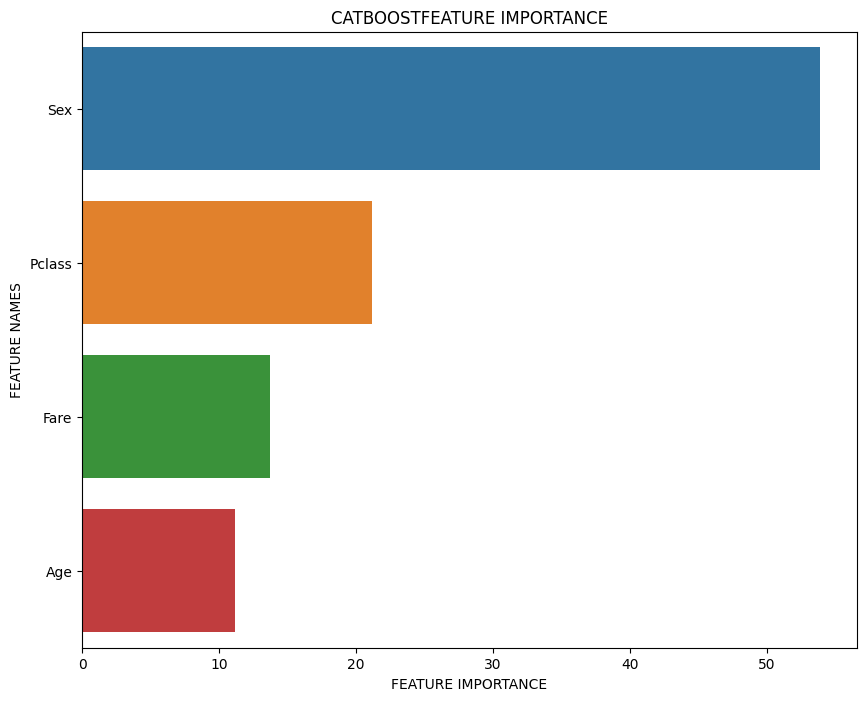

In [41]:
plot_feature_importance(model.get_feature_importance(),x_train.columns,'CATBOOST')

In [43]:
model.calc_feature_statistics(test_data,feature='Sex',plot=True,prediction_type='Class')

{'binarized_feature': array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
        1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
        0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
        1, 1, 0]),
 'mean_target': array([0.7346939 , 0.25384617], dtype=float32),
 'mean_weighted_target': array([], dtype=float32),
 'mean_prediction': array([0.79591835, 0.03076923], dtype=float32),
 'objects_per_bin': array([ 49, 130], dtype=uint32),
 'predictions_on_varying_feature': array([0.78212291, 0.        ]),
 'cat_values': array(['female', 'male'], dtype='<U6')}